# Working with APIs


## Introduction



So far we have learnt how to obtain data from files and from relational databases. 

However, sometimes the data we need is not readily available via one of these two data sources. In some cases, the data we need may be contained within an *application*. 

Application owners will often create APIs **(or Application Programming Interface)** so that their applications can talk to other applications. 

An **API is a set of programmatic instructions for accessing software applications, and the data that comes from APIs typically contains some sort of structure (such as JSON).** 

This structure makes working with API data preferable to crawling websites and scraping content off of web pages.



In this lesson, we are going to learn:

- How to make API calls to an application;
- Retrieve data in JSON format;
- Learn about API authentication;
- and use Python libraries to obtain data from APIs.

## APIs in General

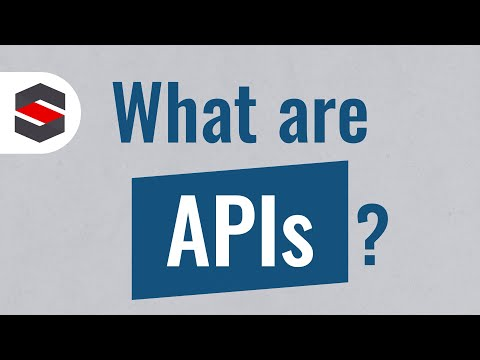

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('OVvTv9Hy91Q', width=800, height=400)

## Simple API Example Requests



There are a few libraries that can be used for working with APIs in Python, but the Requests library is one of the most intuitive. It has a get() method that allows you to send an HTTP request to an application and receive a response.

In [5]:
import json
import requests

response = requests.get('https://jsonplaceholder.typicode.com/todos')
results = response.json() 
#response

In this example, we used the get method to send a request to the JSONPlaceholder API, and we received a response in the form of JSON structured data. 

We can now convert these results into a data frame.

In [6]:
import pandas as pd

data = pd.DataFrame(results)
data.head(10)

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False
5,1,6,qui ullam ratione quibusdam voluptatem quia omnis,False
6,1,7,illo expedita consequatur quia in,False
7,1,8,quo adipisci enim quam ut ab,True
8,1,9,molestiae perspiciatis ipsa,False
9,1,10,illo est ratione doloremque quia maiores aut,True


### StackAPI

Let's now look at a more realistic example of an API. 

In [7]:
# Import StackAPI
from stackapi import StackAPI

In [8]:
# from stackapi import StackAPI
stack_api = StackAPI('stackoverflow')
questions = stack_api.fetch('questions')

In [9]:
questions = pd.DataFrame(questions)
questions.head(10)

,backoff,has_more,page,quota_max,quota_remaining,total,items
0,0,True,5,300,300,0,"{'tags': ['python', 'testing', 'subprocess'], ..."
1,0,True,5,300,300,0,"{'tags': ['javascript', 'vue.js', 'validation'..."
2,0,True,5,300,300,0,"{'tags': ['python', 'regex', 'pandas'], 'owner..."
3,0,True,5,300,300,0,"{'tags': ['docker', '.net-core', 'raspberry-pi..."
4,0,True,5,300,300,0,"{'tags': ['linux', 'awk', 'command'], 'owner':..."
5,0,True,5,300,300,0,"{'tags': ['user-interface', 'user-experience',..."
6,0,True,5,300,300,0,"{'tags': ['graphql', 'svelte', 'sapper'], 'own..."
7,0,True,5,300,300,0,"{'tags': ['javascript', 'html'], 'owner': {'re..."
8,0,True,5,300,300,0,"{'tags': ['neo4j', 'cypher'], 'owner': {'reput..."
9,0,True,5,300,300,0,"{'tags': ['ruby', 'rspec', 'selenium-chromedri..."


In [12]:
questions['items'][0]

{'tags': ['python', 'testing', 'subprocess'],
 'owner': {'reputation': 1076,
  'user_id': 8866053,
  'user_type': 'registered',
  'accept_rate': 100,
  'profile_image': 'https://i.stack.imgur.com/Q1QZv.jpg?s=128&g=1',
  'display_name': 'CtrlAltF2',
  'link': 'https://stackoverflow.com/users/8866053/ctrlaltf2'},
 'is_answered': False,
 'view_count': 8,
 'answer_count': 1,
 'score': 0,
 'last_activity_date': 1596733889,
 'creation_date': 1596732804,
 'last_edit_date': 1596733233,
 'question_id': 63288357,
 'content_license': 'CC BY-SA 4.0',
 'link': 'https://stackoverflow.com/questions/63288357/subprocess-run-leads-to-space-interpreted-as-arg',
 'title': 'subprocess.run leads to space interpreted as arg?'}

## More Complex API Requests


Sometimes API responses contain data that is nested, and we must find a way to **flatten** the JSON data so that it fits nicely into a data frame. To see this, let us make a call to the GitHub API.

### GithubAPI

Let's now make an API call to the Github public API, create a Pandas data frame from the results, and examine the structure of the data.

In [13]:
response = requests.get('https://api.github.com/events')

data = pd.DataFrame(response.json()) 
data.head(10)

,id,type,actor,repo,payload,public,created_at,org
0,13131572881,CreateEvent,"{'id': 20477746, 'login': 'santhoshramanathan'...","{'id': 285277549, 'name': 'santhoshramanathan/...","{'ref': '0.0.1-oneclk-frntend-chart.8', 'ref_t...",True,2020-08-06T17:15:53Z,NaN
1,13131572876,PushEvent,"{'id': 29139614, 'login': 'renovate[bot]', 'di...","{'id': 146916092, 'name': 'commercetools/ui-ki...","{'push_id': 5492236582, 'size': 2, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 1084585, 'login': 'commercetools', 'gra..."
2,13131572868,PushEvent,"{'id': 7911893, 'login': 'slskopytko', 'displa...","{'id': 285627963, 'name': 'Chrzaszczyzewoszyce...","{'push_id': 5492236577, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 13028066, 'login': 'Chrzaszczyzewoszyce..."
3,13131572860,PushEvent,"{'id': 67704827, 'login': 'ctutiya', 'display_...","{'id': 285628440, 'name': 'ctutiya/joshbersin'...","{'push_id': 5492236575, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN
4,13131572843,PushEvent,"{'id': 1748530, 'login': 'antonyantony', 'disp...","{'id': 89720418, 'name': 'antonyantony/libresw...","{'push_id': 5492236564, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN
5,13131572852,PullRequestEvent,"{'id': 27856297, 'login': 'dependabot-preview[...","{'id': 87125103, 'name': 'nypublicradio/nypr-a...","{'action': 'opened', 'number': 106, 'pull_requ...",True,2020-08-06T17:15:53Z,"{'id': 1070797, 'login': 'nypublicradio', 'gra..."
6,13131572849,MemberEvent,"{'id': 68732767, 'login': 'iiitnprobe', 'displ...","{'id': 282615733, 'name': 'iiitnprobe/iiitnpro...","{'member': {'login': 'Hemanshu68', 'id': 61977...",True,2020-08-06T17:15:53Z,NaN
7,13131572834,PullRequestReviewCommentEvent,"{'id': 2251653, 'login': 'adrian-prantl', 'dis...","{'id': 44838949, 'name': 'apple/swift', 'url':...","{'action': 'created', 'comment': {'url': 'http...",True,2020-08-06T17:15:52Z,"{'id': 10639145, 'login': 'apple', 'gravatar_i..."
8,13131572832,PushEvent,"{'id': 21154424, 'login': 'q375ml', 'display_l...","{'id': 138178056, 'name': 'q375ml/PEGGY-PORTFO...","{'push_id': 5492236560, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN
9,13131572820,PushEvent,"{'id': 11172640, 'login': 'mengjutsai', 'displ...","{'id': 285614403, 'name': 'mengjutsai/tutorial...","{'push_id': 5492236548, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN


Since many of the columns are nested, we are going to do the following: 

- Turn the nested dictionaries into a data frame with a column for each key;
- Assign column names to each column in this new data frame;
- Add these new columns to the original data frame;
- Drop the column with the nested dictionaries.

### More Complex API Requests: One Column

In [14]:
# select the data['actor'] column
data['actor']

0     {'id': 20477746, 'login': 'santhoshramanathan'...
1     {'id': 29139614, 'login': 'renovate[bot]', 'di...
2     {'id': 7911893, 'login': 'slskopytko', 'displa...
3     {'id': 67704827, 'login': 'ctutiya', 'display_...
4     {'id': 1748530, 'login': 'antonyantony', 'disp...
5     {'id': 27856297, 'login': 'dependabot-preview[...
6     {'id': 68732767, 'login': 'iiitnprobe', 'displ...
7     {'id': 2251653, 'login': 'adrian-prantl', 'dis...
8     {'id': 21154424, 'login': 'q375ml', 'display_l...
9     {'id': 11172640, 'login': 'mengjutsai', 'displ...
10    {'id': 50760049, 'login': 'nive927', 'display_...
11    {'id': 27856297, 'login': 'dependabot-preview[...
12    {'id': 2266860, 'login': 'hellifiknow', 'displ...
13    {'id': 1864323, 'login': 'stripe-ci', 'display...
14    {'id': 4990456, 'login': 'litespeedtech', 'dis...
15    {'id': 7726127, 'login': 'kwsutter', 'display_...
16    {'id': 16691757, 'login': 'felipeblazing', 'di...
17    {'id': 68343783, 'login': 'yonzmeer', 'dis

In [15]:
# convert the data['actor'] column to a dictionary
dict(data['actor'])

{0: {'id': 20477746,
  'login': 'santhoshramanathan',
  'display_login': 'santhoshramanathan',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/santhoshramanathan',
  'avatar_url': 'https://avatars.githubusercontent.com/u/20477746?'},
 1: {'id': 29139614,
  'login': 'renovate[bot]',
  'display_login': 'renovate',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/renovate[bot]',
  'avatar_url': 'https://avatars.githubusercontent.com/u/29139614?'},
 2: {'id': 7911893,
  'login': 'slskopytko',
  'display_login': 'slskopytko',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/slskopytko',
  'avatar_url': 'https://avatars.githubusercontent.com/u/7911893?'},
 3: {'id': 67704827,
  'login': 'ctutiya',
  'display_login': 'ctutiya',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/ctutiya',
  'avatar_url': 'https://avatars.githubusercontent.com/u/67704827?'},
 4: {'id': 1748530,
  'login': 'antonyantony',
  'display_login': 'antonyantony',
  'gravatar_i

In [16]:
# create a new data frame 
flatten = pd.DataFrame(dict(data['actor']))
flatten.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
id,20477746,29139614,7911893,67704827,1748530,27856297,68732767,2251653,21154424,11172640,...,35613825,68934996,41898282,3455449,62543621,18289117,58181,63174725,43582323,55092420
login,santhoshramanathan,renovate[bot],slskopytko,ctutiya,antonyantony,dependabot-preview[bot],iiitnprobe,adrian-prantl,q375ml,mengjutsai,...,vercel[bot],IvanM117,github-actions[bot],Dids,llvm-premerge-tests-bot,kleitonkltn,lkramer,gethiskg,Shijokingo,jacobdonais
display_login,santhoshramanathan,renovate,slskopytko,ctutiya,antonyantony,dependabot-preview,iiitnprobe,adrian-prantl,q375ml,mengjutsai,...,vercel,IvanM117,github-actions,Dids,llvm-premerge-tests-bot,kleitonkltn,lkramer,gethiskg,Shijokingo,jacobdonais
gravatar_id,,,,,,,,,,,...,,,,,,,,,,
url,https://api.github.com/users/santhoshramanathan,https://api.github.com/users/renovate[bot],https://api.github.com/users/slskopytko,https://api.github.com/users/ctutiya,https://api.github.com/users/antonyantony,https://api.github.com/users/dependabot-previe...,https://api.github.com/users/iiitnprobe,https://api.github.com/users/adrian-prantl,https://api.github.com/users/q375ml,https://api.github.com/users/mengjutsai,...,https://api.github.com/users/vercel[bot],https://api.github.com/users/IvanM117,https://api.github.com/users/github-actions[bot],https://api.github.com/users/Dids,https://api.github.com/users/llvm-premerge-tes...,https://api.github.com/users/kleitonkltn,https://api.github.com/users/lkramer,https://api.github.com/users/gethiskg,https://api.github.com/users/Shijokingo,https://api.github.com/users/jacobdonais


In [17]:
# transpose flatten

flatten = pd.DataFrame(dict(data['actor'])).transpose()
flatten.head()

,id,login,display_login,gravatar_id,url,avatar_url
0,20477746,santhoshramanathan,santhoshramanathan,,https://api.github.com/users/santhoshramanathan,https://avatars.githubusercontent.com/u/20477746?
1,29139614,renovate[bot],renovate,,https://api.github.com/users/renovate[bot],https://avatars.githubusercontent.com/u/29139614?
2,7911893,slskopytko,slskopytko,,https://api.github.com/users/slskopytko,https://avatars.githubusercontent.com/u/7911893?
3,67704827,ctutiya,ctutiya,,https://api.github.com/users/ctutiya,https://avatars.githubusercontent.com/u/67704827?
4,1748530,antonyantony,antonyantony,,https://api.github.com/users/antonyantony,https://avatars.githubusercontent.com/u/1748530?


In [18]:
# save the columns as strings

columns = [str(i) for i in flatten.columns]
columns

['id', 'login', 'display_login', 'gravatar_id', 'url', 'avatar_url']

In [19]:
# rename the columns for actor
# ['id', 'login', 'display_login', 'gravatar_id', 'url', 'avatar_url']

flatten.columns = ['actor' + '_' + colname for colname in columns]
flatten.columns

Index(['actor_id', 'actor_login', 'actor_display_login', 'actor_gravatar_id',
       'actor_url', 'actor_avatar_url'],
      dtype='object')

In [20]:
# add flatten to data using pd.concat

data = pd.concat([data, flatten], axis=1)
data.head()

,id,type,actor,repo,payload,public,created_at,org,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url
0,13131572881,CreateEvent,"{'id': 20477746, 'login': 'santhoshramanathan'...","{'id': 285277549, 'name': 'santhoshramanathan/...","{'ref': '0.0.1-oneclk-frntend-chart.8', 'ref_t...",True,2020-08-06T17:15:53Z,NaN,20477746,santhoshramanathan,santhoshramanathan,,https://api.github.com/users/santhoshramanathan,https://avatars.githubusercontent.com/u/20477746?
1,13131572876,PushEvent,"{'id': 29139614, 'login': 'renovate[bot]', 'di...","{'id': 146916092, 'name': 'commercetools/ui-ki...","{'push_id': 5492236582, 'size': 2, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 1084585, 'login': 'commercetools', 'gra...",29139614,renovate[bot],renovate,,https://api.github.com/users/renovate[bot],https://avatars.githubusercontent.com/u/29139614?
2,13131572868,PushEvent,"{'id': 7911893, 'login': 'slskopytko', 'displa...","{'id': 285627963, 'name': 'Chrzaszczyzewoszyce...","{'push_id': 5492236577, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 13028066, 'login': 'Chrzaszczyzewoszyce...",7911893,slskopytko,slskopytko,,https://api.github.com/users/slskopytko,https://avatars.githubusercontent.com/u/7911893?
3,13131572860,PushEvent,"{'id': 67704827, 'login': 'ctutiya', 'display_...","{'id': 285628440, 'name': 'ctutiya/joshbersin'...","{'push_id': 5492236575, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,67704827,ctutiya,ctutiya,,https://api.github.com/users/ctutiya,https://avatars.githubusercontent.com/u/67704827?
4,13131572843,PushEvent,"{'id': 1748530, 'login': 'antonyantony', 'disp...","{'id': 89720418, 'name': 'antonyantony/libresw...","{'push_id': 5492236564, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,1748530,antonyantony,antonyantony,,https://api.github.com/users/antonyantony,https://avatars.githubusercontent.com/u/1748530?


In [21]:
# drop the 'messy' column

data = data.drop('actor', axis=1)

In [22]:
data.head(10)

,id,type,repo,payload,public,created_at,org,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url
0,13131572881,CreateEvent,"{'id': 285277549, 'name': 'santhoshramanathan/...","{'ref': '0.0.1-oneclk-frntend-chart.8', 'ref_t...",True,2020-08-06T17:15:53Z,NaN,20477746,santhoshramanathan,santhoshramanathan,,https://api.github.com/users/santhoshramanathan,https://avatars.githubusercontent.com/u/20477746?
1,13131572876,PushEvent,"{'id': 146916092, 'name': 'commercetools/ui-ki...","{'push_id': 5492236582, 'size': 2, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 1084585, 'login': 'commercetools', 'gra...",29139614,renovate[bot],renovate,,https://api.github.com/users/renovate[bot],https://avatars.githubusercontent.com/u/29139614?
2,13131572868,PushEvent,"{'id': 285627963, 'name': 'Chrzaszczyzewoszyce...","{'push_id': 5492236577, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,"{'id': 13028066, 'login': 'Chrzaszczyzewoszyce...",7911893,slskopytko,slskopytko,,https://api.github.com/users/slskopytko,https://avatars.githubusercontent.com/u/7911893?
3,13131572860,PushEvent,"{'id': 285628440, 'name': 'ctutiya/joshbersin'...","{'push_id': 5492236575, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,67704827,ctutiya,ctutiya,,https://api.github.com/users/ctutiya,https://avatars.githubusercontent.com/u/67704827?
4,13131572843,PushEvent,"{'id': 89720418, 'name': 'antonyantony/libresw...","{'push_id': 5492236564, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,1748530,antonyantony,antonyantony,,https://api.github.com/users/antonyantony,https://avatars.githubusercontent.com/u/1748530?
5,13131572852,PullRequestEvent,"{'id': 87125103, 'name': 'nypublicradio/nypr-a...","{'action': 'opened', 'number': 106, 'pull_requ...",True,2020-08-06T17:15:53Z,"{'id': 1070797, 'login': 'nypublicradio', 'gra...",27856297,dependabot-preview[bot],dependabot-preview,,https://api.github.com/users/dependabot-previe...,https://avatars.githubusercontent.com/u/27856297?
6,13131572849,MemberEvent,"{'id': 282615733, 'name': 'iiitnprobe/iiitnpro...","{'member': {'login': 'Hemanshu68', 'id': 61977...",True,2020-08-06T17:15:53Z,NaN,68732767,iiitnprobe,iiitnprobe,,https://api.github.com/users/iiitnprobe,https://avatars.githubusercontent.com/u/68732767?
7,13131572834,PullRequestReviewCommentEvent,"{'id': 44838949, 'name': 'apple/swift', 'url':...","{'action': 'created', 'comment': {'url': 'http...",True,2020-08-06T17:15:52Z,"{'id': 10639145, 'login': 'apple', 'gravatar_i...",2251653,adrian-prantl,adrian-prantl,,https://api.github.com/users/adrian-prantl,https://avatars.githubusercontent.com/u/2251653?
8,13131572832,PushEvent,"{'id': 138178056, 'name': 'q375ml/PEGGY-PORTFO...","{'push_id': 5492236560, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,21154424,q375ml,q375ml,,https://api.github.com/users/q375ml,https://avatars.githubusercontent.com/u/21154424?
9,13131572820,PushEvent,"{'id': 285614403, 'name': 'mengjutsai/tutorial...","{'push_id': 5492236548, 'size': 1, 'distinct_s...",True,2020-08-06T17:15:53Z,NaN,11172640,mengjutsai,mengjutsai,,https://api.github.com/users/mengjutsai,https://avatars.githubusercontent.com/u/11172640?


### More Complex API Requests: For Loop 



Most data types of these kinds have more than one condensed column. In that case, it is useful to simply loop over those columns for which this holds.

In [23]:
# Reinitialise the data
response = requests.get('https://api.github.com/events')
data = pd.DataFrame(response.json())

In [24]:
data.head(10)

,id,type,actor,repo,payload,public,created_at,org
0,13131803442,PushEvent,"{'id': 45753873, 'login': 'GuldLuca', 'display...","{'id': 278071331, 'name': 'GuldLuca/nodejs_exa...","{'push_id': 5492355825, 'size': 1, 'distinct_s...",True,2020-08-06T17:41:49Z,NaN
1,13131803436,DeleteEvent,"{'id': 2874965, 'login': 'qooplmao', 'display_...","{'id': 231526885, 'name': 'qooplmao/michaelfit...","{'ref': 'renovate/gatsby-monorepo', 'ref_type'...",True,2020-08-06T17:41:49Z,NaN
2,13131803426,PushEvent,"{'id': 25770527, 'login': 'pranavfriend1', 'di...","{'id': 198056400, 'name': 'Ashutoshtripathi14/...","{'push_id': 5492355808, 'size': 1, 'distinct_s...",True,2020-08-06T17:41:49Z,NaN
3,13131803427,WatchEvent,"{'id': 44944407, 'login': 'xuanyu123', 'displa...","{'id': 281119466, 'name': 'wgpsec/Perception',...",{'action': 'started'},True,2020-08-06T17:41:49Z,"{'id': 20661677, 'login': 'wgpsec', 'gravatar_..."
4,13131803418,PushEvent,"{'id': 6268905, 'login': 'me-jser', 'display_l...","{'id': 157518180, 'name': 'jdcloudcom/MKTConte...","{'push_id': 5492355798, 'size': 1, 'distinct_s...",True,2020-08-06T17:41:49Z,"{'id': 40586795, 'login': 'jdcloudcom', 'grava..."
5,13131803423,PullRequestEvent,"{'id': 51982242, 'login': 'idazanggara', 'disp...","{'id': 285508721, 'name': 'kelompok1-cryptocur...","{'action': 'closed', 'number': 10, 'pull_reque...",True,2020-08-06T17:41:49Z,"{'id': 69297751, 'login': 'kelompok1-cryptocur..."
6,13131803425,CreateEvent,"{'id': 16035941, 'login': 'JavierLaguna', 'dis...","{'id': 285633679, 'name': 'JavierLaguna/Eh-Ho-...","{'ref': None, 'ref_type': 'repository', 'maste...",True,2020-08-06T17:41:49Z,NaN
7,13131803421,DeleteEvent,"{'id': 49699333, 'login': 'dependabot[bot]', '...","{'id': 254961488, 'name': 'khkwan0/tourneydb',...",{'ref': 'dependabot/npm_and_yarn/api/fastify-2...,True,2020-08-06T17:41:49Z,NaN
8,13131803414,PushEvent,"{'id': 38430641, 'login': 'Reactiver', 'displa...","{'id': 266059778, 'name': 'Reactiver/ide-setti...","{'push_id': 5492355804, 'size': 1, 'distinct_s...",True,2020-08-06T17:41:49Z,NaN
9,13131803406,PushEvent,"{'id': 53914655, 'login': 'ebapidb', 'display_...","{'id': 174544468, 'name': 'VEuPathDB/StaticCon...","{'push_id': 5492355803, 'size': 1, 'distinct_s...",True,2020-08-06T17:41:49Z,"{'id': 903733, 'login': 'VEuPathDB', 'gravatar..."


In [25]:
# select the columns that contain a dictionary
col_list = ['actor', 'org', 'payload', 'repo']

In [26]:
# Create a for-loop to loop over the columns
# col_list = ['actor', 'org', 'payload', 'repo']

for column in col_list:
    flattened = pd.DataFrame(dict(data[column])).transpose()
    columns = [str(col) for col in flattened.columns]
    flattened.columns = [column + '_' + colname for colname in columns]
    data = pd.concat([data, flattened], axis=1)
    data = data.drop(column, axis=1)

In [27]:
data.head()

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_number,payload_pull_request,payload_master_branch,payload_description,payload_issue,payload_comment,payload_member,repo_id,repo_name,repo_url
0,13131803442,PushEvent,True,2020-08-06T17:41:49Z,45753873,GuldLuca,GuldLuca,,https://api.github.com/users/GuldLuca,https://avatars.githubusercontent.com/u/45753873?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278071331,GuldLuca/nodejs_exam,https://api.github.com/repos/GuldLuca/nodejs_exam
1,13131803436,DeleteEvent,True,2020-08-06T17:41:49Z,2874965,qooplmao,qooplmao,,https://api.github.com/users/qooplmao,https://avatars.githubusercontent.com/u/2874965?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231526885,qooplmao/michaelfitzpatrick.co.uk,https://api.github.com/repos/qooplmao/michaelf...
2,13131803426,PushEvent,True,2020-08-06T17:41:49Z,25770527,pranavfriend1,pranavfriend1,,https://api.github.com/users/pranavfriend1,https://avatars.githubusercontent.com/u/25770527?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198056400,Ashutoshtripathi14/vector,https://api.github.com/repos/Ashutoshtripathi1...
3,13131803427,WatchEvent,True,2020-08-06T17:41:49Z,44944407,xuanyu123,xuanyu123,,https://api.github.com/users/xuanyu123,https://avatars.githubusercontent.com/u/44944407?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281119466,wgpsec/Perception,https://api.github.com/repos/wgpsec/Perception
4,13131803418,PushEvent,True,2020-08-06T17:41:49Z,6268905,me-jser,me-jser,,https://api.github.com/users/me-jser,https://avatars.githubusercontent.com/u/6268905?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157518180,jdcloudcom/MKTContent,https://api.github.com/repos/jdcloudcom/MKTCon...


### More Complex API Requests: Function 



We can also write a function that does this for us. Using a function allows us to return a new data frame without actually interfering upon the original one. 

In [28]:
# Reinitialise the data
response = requests.get('https://api.github.com/events')
data = pd.DataFrame(response.json())

In [29]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [30]:
# Call the function flatten
nested_columns = ['actor', 'org', 'payload', 'repo']

flat = flatten(data, nested_columns)

In [31]:
# display here
flat.head(10)

,id,type,public,created_at,actor_id,actor_login,actor_display_login,actor_gravatar_id,actor_url,actor_avatar_url,...,payload_size,payload_distinct_size,payload_head,payload_before,payload_commits,payload_number,payload_issue,repo_id,repo_name,repo_url
0,13131873853,PullRequestReviewCommentEvent,True,2020-08-06T17:21:50Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21740844,openshift/openshift-docs,https://api.github.com/repos/openshift/openshi...
1,13131873863,CreateEvent,True,2020-08-06T17:49:44Z,45901471,AadiRana911,AadiRana911,,https://api.github.com/users/AadiRana911,https://avatars.githubusercontent.com/u/45901471?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285635228,AadiRana911/aadi-rana.github.io,https://api.github.com/repos/AadiRana911/aadi-...
2,13131873855,PushEvent,True,2020-08-06T17:49:44Z,21114956,ValeFranchi,ValeFranchi,,https://api.github.com/users/ValeFranchi,https://avatars.githubusercontent.com/u/21114956?,...,1,1,e620bf4d51311b2d8e7ec60edbb72ba000361328,2580d7ad5570447ce242ed3b65efc9355393ca2a,[{'sha': 'e620bf4d51311b2d8e7ec60edbb72ba00036...,NaN,NaN,202741795,loopstudio/react-app-boilerplate,https://api.github.com/repos/loopstudio/react-...
3,13131873862,DeleteEvent,True,2020-08-06T17:49:44Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264158548,haiphandesign/hai,https://api.github.com/repos/haiphandesign/hai
4,13131873859,PullRequestReviewCommentEvent,True,2020-08-06T17:31:10Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21740844,openshift/openshift-docs,https://api.github.com/repos/openshift/openshi...
5,13131873852,CreateEvent,True,2020-08-06T17:49:44Z,47634520,jcrattz,jcrattz,,https://api.github.com/users/jcrattz,https://avatars.githubusercontent.com/u/47634520?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268943195,digitalearthafrica/deafrica-training-workshop,https://api.github.com/repos/digitalearthafric...
6,13131873856,DeleteEvent,True,2020-08-06T17:49:44Z,21114956,ValeFranchi,ValeFranchi,,https://api.github.com/users/ValeFranchi,https://avatars.githubusercontent.com/u/21114956?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202741795,loopstudio/react-app-boilerplate,https://api.github.com/repos/loopstudio/react-...
7,13131873842,PullRequestReviewCommentEvent,True,2020-08-06T17:20:56Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21740844,openshift/openshift-docs,https://api.github.com/repos/openshift/openshi...
8,13131873841,PullRequestReviewCommentEvent,True,2020-08-06T17:49:44Z,15035320,cdaly333,cdaly333,,https://api.github.com/users/cdaly333,https://avatars.githubusercontent.com/u/15035320?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267624045,googleinterns/smart-home-local,https://api.github.com/repos/googleinterns/sma...
9,13131873838,PullRequestEvent,True,2020-08-06T17:49:44Z,59701002,rebecatalkdesk,rebecatalkdesk,,https://api.github.com/users/rebecatalkdesk,https://avatars.githubusercontent.com/u/59701002?,...,NaN,NaN,NaN,NaN,NaN,187,NaN,261232338,Talkdesk/CREAC,https://api.github.com/repos/Talkdesk/CREAC


### More Complex API Requests: JSON_Normalise Function  


Alternatively, we can flatten nested data using the function json_normalize. This function is part of the Pandas library. 



Here is an example of how to use this function. 

In [33]:
from pandas.io.json import json_normalize

results = response.json()
#results

In [34]:
flattened_data = json_normalize(results)
flattened_data

,id,type,public,created_at,actor.id,actor.login,actor.display_login,actor.gravatar_id,actor.url,actor.avatar_url,...,payload.issue.created_at,payload.issue.updated_at,payload.issue.closed_at,payload.issue.author_association,payload.issue.active_lock_reason,payload.issue.body,payload.issue.performed_via_github_app,payload.comment.issue_url,payload.comment.performed_via_github_app,payload.pull_request.merged_by
0,13131873853,PullRequestReviewCommentEvent,True,2020-08-06T17:21:50Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13131873863,CreateEvent,True,2020-08-06T17:49:44Z,45901471,AadiRana911,AadiRana911,,https://api.github.com/users/AadiRana911,https://avatars.githubusercontent.com/u/45901471?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13131873855,PushEvent,True,2020-08-06T17:49:44Z,21114956,ValeFranchi,ValeFranchi,,https://api.github.com/users/ValeFranchi,https://avatars.githubusercontent.com/u/21114956?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13131873862,DeleteEvent,True,2020-08-06T17:49:44Z,49699333,dependabot[bot],dependabot,,https://api.github.com/users/dependabot[bot],https://avatars.githubusercontent.com/u/49699333?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13131873859,PullRequestReviewCommentEvent,True,2020-08-06T17:31:10Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13131873852,CreateEvent,True,2020-08-06T17:49:44Z,47634520,jcrattz,jcrattz,,https://api.github.com/users/jcrattz,https://avatars.githubusercontent.com/u/47634520?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,13131873856,DeleteEvent,True,2020-08-06T17:49:44Z,21114956,ValeFranchi,ValeFranchi,,https://api.github.com/users/ValeFranchi,https://avatars.githubusercontent.com/u/21114956?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,13131873842,PullRequestReviewCommentEvent,True,2020-08-06T17:20:56Z,1738558,codyhoag,codyhoag,,https://api.github.com/users/codyhoag,https://avatars.githubusercontent.com/u/1738558?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13131873841,PullRequestReviewCommentEvent,True,2020-08-06T17:49:44Z,15035320,cdaly333,cdaly333,,https://api.github.com/users/cdaly333,https://avatars.githubusercontent.com/u/15035320?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13131873838,PullRequestEvent,True,2020-08-06T17:49:44Z,59701002,rebecatalkdesk,rebecatalkdesk,,https://api.github.com/users/rebecatalkdesk,https://avatars.githubusercontent.com/u/59701002?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Important**: Sometimes multiple rounds of flattening will be required if the JSON data returned from the API you are working with has hierarchically nested data.

## Summary

In this lesson, we covered:


- The basics of working with APIs and API libraries;

- How to work with more complex API calls;

- How to flatten JSON-structured data. 